In [46]:
import pytraj as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class TrajectoryBuilder():
    '''
    A wrapper class for calling common trajectory functions
    '''
    def __init__(self,trajectory_file,topology,mask = '@*',skip=1):
        self.computed_dic = {'rmsd' : False, 'k_means' : False}
        self.mask = mask
        self.trajectory_file = trajectory_file
        self.topology = topology
        self.trajectory = pt.Trajectory(trajectory_file, topology)[mask][0::skip]

    def compute_rmsd(self):
        self.rmsd = pt.rmsd(traj=self.trajectory, mask=self.mask)
        self.computed_dic['rmsd'] = True
        return self.rmsd
    
    def plot_rmsd(self):
        if not self.computed_dic['rmsd']:
            self.compute_rmsd()
        df = pd.DataFrame(self.rmsd)
        df.plot()
    
    def compute_kmeans(self,num_clusters):
        self.num_clusters = num_clusters
        self.k_means = pt.cluster.kmeans(self.trajectory,n_clusters=num_clusters)
        self.computed_dic['k_means'] = True
        return self.k_means
    
    def build_MSM(self,num_clusters = None):
        if not self.computed_dic['k_means']:
            self.compute_kmeans(3)
        transition_matrix = [[0] * self.num_clusters for num in range(self.num_clusters)]
        cluster_indices = self.k_means.cluster_index
        for index in range(len(cluster_indices) - 1):
            transition_matrix[cluster_indices[index]][cluster_indices[index+1]] += 1 
        return transition_matrix
    


In [47]:
def regex_lite(s):
    firstMatch = s.index('[')
    secondMatch = s.index(']')
    f = s[firstMatch+1:secondMatch].split('-')
    arr = []
    bound1 = int(f[0])
    bound2 = int(f[1])
    for i in range(bound1,bound2+1):
        arr.append(f'H{i}')
    return ",".join(arr)

In [48]:
from scipy.spatial.distance import cdist
hydrogens = regex_lite('H[1-10]')
mask = '@C*,H,' + hydrogens
traj = TrajectoryBuilder('../Hexane/Hexane_wat_strip.trj','../Hexane/Hexane_nowat.prmtop',mask)
hexane_trajectory = traj.trajectory
hexane_trajectory.top.set_nobox()
hexane_trajectory.superpose(ref=0)
hexane_trajectory = hexane_trajectory[::5]
hexane_data = np.empty((0,17,17))
for i in range(len(hexane_trajectory) - 1): 
    newarr = cdist(hexane_trajectory[i],hexane_trajectory[i+1]).reshape(1,17,17)
    hexane_data = np.append(hexane_data,newarr,axis=0)

In [49]:
training_data = [(data,0) for data in hexane_data]

In [50]:
hydrogens = regex_lite('H[1-10]')
mask = '@C*,H,' + hydrogens
traj2 = TrajectoryBuilder('../Hexanol/Hexanol_wat_strip.trj','../Hexanol/Hexanol_nowat.prmtop',mask)
hexanol_trajectory = traj.trajectory
hexanol_trajectory.top.set_nobox()
hexanol_trajectory.superpose(ref=0)
hexanol_trajectory = hexanol_trajectory[::5]
hexanol_data = np.empty((0,17,17))
for i in range(len(hexanol_trajectory) - 1): 
    newarr = cdist(hexanol_trajectory[i],hexanol_trajectory[i+1]).reshape(1,17,17)
    hexanol_data = np.append(hexanol_data,newarr,axis=0)
    
    

In [51]:
for data in hexanol_data:
    training_data.append((data,1))


In [52]:

hydrogens = regex_lite('H[1-10]')
mask = '@C*,H,' + hydrogens
traj3 = TrajectoryBuilder('../Hexanoic/Hexanoic_wat_strip.trj','../Hexanoic/Hexanoic_nowat.prmtop',mask)
hexanoic_trajectory = traj.trajectory
hexanoic_trajectory.top.set_nobox()
hexanoic_trajectory.superpose(ref=0)
hexanoic_trajectory = hexanoic_trajectory[::5]
hexanoic_data = np.empty((0,17,17))
for i in range(len(hexanoic_trajectory) - 1): 
    newarr = cdist(hexanoic_trajectory[i],hexanoic_trajectory[i+1]).reshape(1,17,17)
    hexanoic_data = np.append(hexanoic_data,newarr,axis=0)



In [53]:
for data in hexanoic_data:
    training_data.append((data,2))

In [54]:
import random
random.shuffle(training_data)


In [55]:
validation = training_data[:3005]

In [56]:
test = training_data[3005:7010]

In [57]:
training = training_data[7010:]

In [58]:
training_data = [x[0] for x in training]


In [59]:
validation_data = [x[0] for x in validation]

In [60]:
X_train = np.empty((0,17,17))
for data in training_data:
    X_train = np.append(X_train,data.reshape(1,17,17),axis=0)


In [130]:
Y_train = [x[1] for x in training]
Y_train = np.array(Y_train)

In [62]:
X_val = np.empty((0,17,17)) 
for data in validation_data:
    X_val = np.append(X_val,data.reshape(1,17,17),axis=0)


In [129]:
Y_val = [x[1] for x in validation]
Y_val = np.array(Y_val)


[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]]


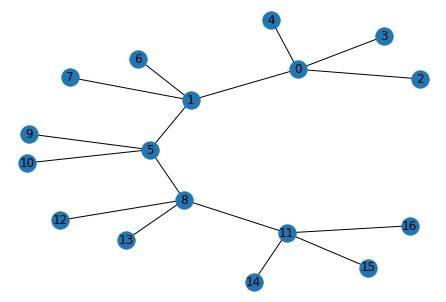

In [118]:
import sys
import math
import networkx as nx

np.set_printoptions(threshold=sys.maxsize)

def build_adjacency_from_topology(topology,for_filter):
    '''
    builds adjacency matrix with self loops
    num_atoms (int) : number of atoms in the topology
    bond_connections (array) : connections
    '''
    num_atoms = topology.n_atoms
    bond_connections = topology.bond_indices
    adjacency_matrix = np.zeros((num_atoms,num_atoms))
    for row in bond_connections:
        if for_filter:
            adjacency_matrix[row[1]][row[1]] = 1
            adjacency_matrix[row[0]][row[0]] = 1
        
        adjacency_matrix[row[0]][row[1]] = 1
        adjacency_matrix[row[1]][row[0]] = 1
       
    return adjacency_matrix


def compute_distance_tensor(trajectory):
    cutoff_vec = np.vectorize(lambda x: 0 if x > 2.5 else 1)
    matrix = pt.analysis.matrix.dist(trajectory)
    return np.vectorize(cutoff_vec)(matrix)
    
    

def compute_degree_matrix(adjacency_matrix):
    shape = adjacency_matrix.shape[0]
    degree_matrix = np.zeros((shape,shape))
    for i,row in enumerate(adjacency_matrix):
        incident_edges = np.sum(row)
        degree_matrix[i][i] = 1/math.sqrt(incident_edges)
    
    return degree_matrix

A_hat = build_adjacency_from_topology(hexane_trajectory.top,True)
A = build_adjacency_from_topology(hexane_trajectory.top,False)
print(A_hat)
D = compute_degree_matrix(A_hat)

G = nx.Graph(A_hat)
pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos,with_labels = True)

In [119]:
import tensorflow as tf
tf.config.run_functions_eagerly(False) 

In [166]:
class GraphConvolution(tf.keras.layers.Layer):
    def __init__(self,units,diagonal,adjacency):
        super(GraphConvolution, self).__init__()
        self.units = units
        self.diagonal = diagonal
        self.adjacency = adjacency

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        
    def call(self, inputs):
        hw = tf.matmul(inputs,self.w)
        dh = tf.matmul(self.diagonal,hw)
        ad = tf.matmul(self.adjacency,dh)
        return tf.keras.layers.Activation('relu')(tf.matmul(self.diagonal,ad))


In [251]:
import spektral
from tensorflow.keras.layers import Dense
class GCNN(tf.keras.Model):
    def __init__(self,diagonal,adjacency,a_hat):
        super(GCNN, self).__init__()
        self.diagonal = diagonal
        self.adjacency = adjacency
        self.gcn_filter = spektral.utils.convolution.gcn_filter(adjacency)
        self.mincut = spektral.layers.MinCutPool(10)
        self.GCN1 = spektral.layers.GCNConv(12)
        self.GCN2 = spektral.layers.GCNConv(5)
        self.graphconvolve2 = GraphConvolution(5,diagonal,a_hat)
        self.pool = spektral.layers.GlobalAttentionPool(1)
        
    def call(self, inputs):
        GCN1 = self.GCN1([inputs, self.gcn_filter])
        mincut = self.mincut([GCN1,self.adjacency])
        tensor = mincut[1][0]
        newfilter = spektral.utils.convolution.gcn_filter(tensor)
        GCN2 =  self.GCN2([mincut[0], newfilter])
        pool = self.pool(GCN2)
        return Dense(3,'softmax')(pool)
    

model = GCNN(D.astype('float32'),A,A_hat.astype('float32'))


        

In [252]:
# Y_train = tf.keras.utils.to_categorical(Y_train)
# Y_val = tf.keras.utils.to_categorical(Y_val)

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(
    X_train,
    Y_train,
    batch_size=256,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, Y_val),
)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



/Users/dylanabramson/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from sklearn.manifold import TSNE
%matplotlib notebook
F = np.identity(20)
output = model(F.astype('float32'))
output = output.numpy()


In [ ]:
hexane_differences.shape

In [ ]:
hexanol_differences.shape

In [ ]:
hexanoic_differences.shape

In [ ]:
hexane_differences[0,0].shape